<IPython.core.display.Javascript object>


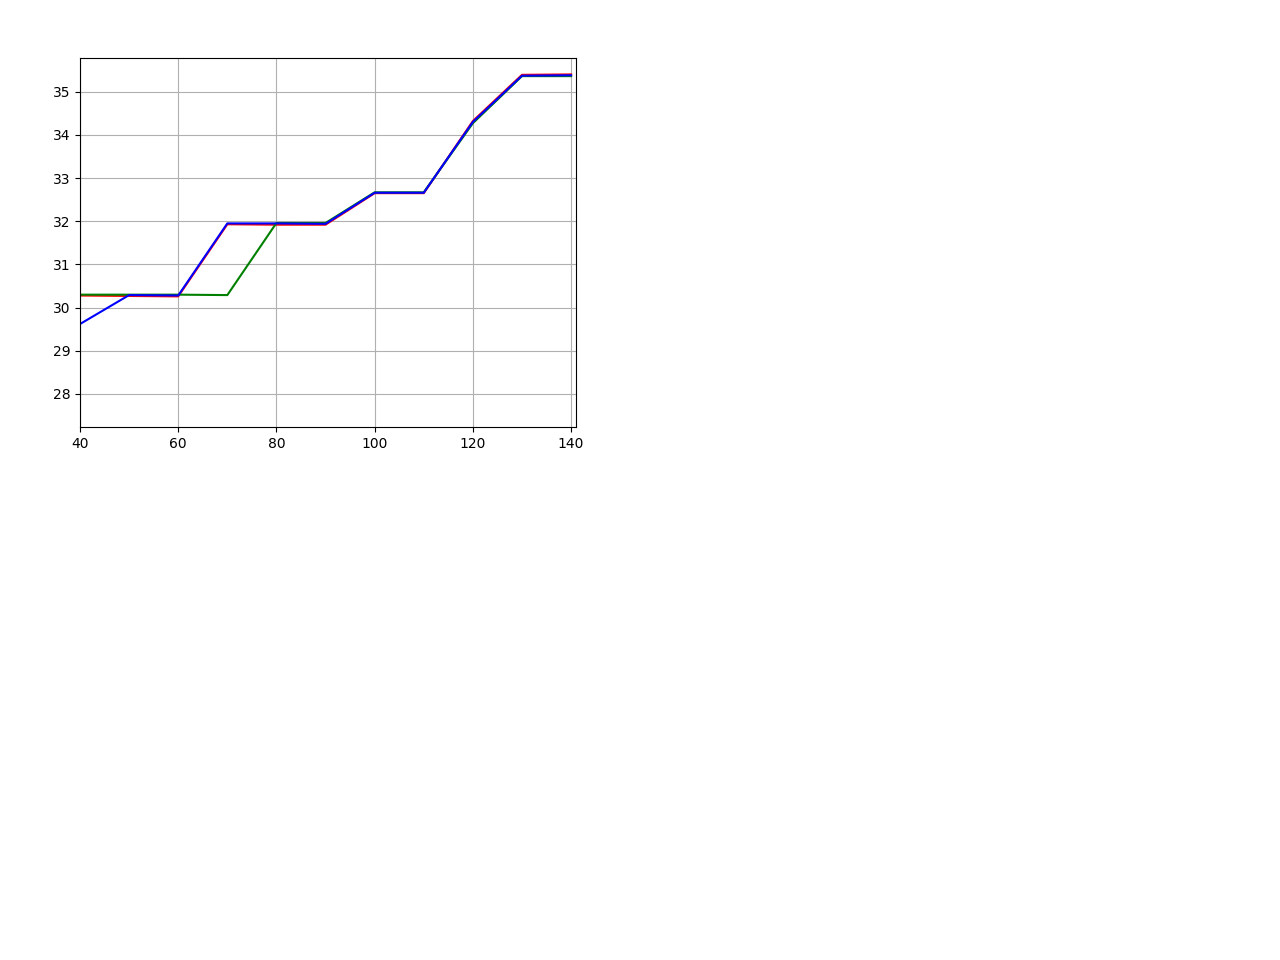

KeyboardInterrupt: 

In [1]:
import requests
import json
import sys
import datetime
import time
import statistics
import matplotlib.pyplot as plt
from pymongo import MongoClient
%matplotlib notebook

# university class
class Univ:
    def __init__(self, city):
        self.min_temp = {"min": 99, "time": 0}
        self.max_temp = {"max": -99, "time": 0}
        self.graph = []
        self.minmax = {}
        self.city = {"campus": city}

    def get_min(self):
        return self.min_temp

    def get_max(self):
        return self.max_temp

    def set_min(self, temp, time):
        if self.min_temp['min'] > temp:
            self.min_temp['min'] = temp
            self.min_temp['time'] = time
            self.minmax[0] = temp

    def set_max(self, temp, time):
        if self.max_temp['max'] < temp:
            self.max_temp['max'] = temp
            self.max_temp['time'] = time
            self.minmax[1] = temp

    def set_temp(self, temp, time):
        self.set_min(temp, time)
        self.set_max(temp, time)
        self.graph.append(temp)

    def get_graph(self):
        return self.graph

    def get_mm(self):
        return self.minmax

    def get_name(self):
        return self.city

    def get_db_query(self):
        return json.dumps("{\"temp\":[" + json.dumps(self.get_name()) + ',' + json.dumps(
            self.get_min()) + ',' + json.dumps(self.get_max()) + "]}")


latrobe_bundoora = 'http://api.openweathermap.org/data/2.5/weather?zip=3086,au&units=metric&APPID=d69a4b6015c26ca2ef20c16aecdeaee8'
monash_clayton = 'http://api.openweathermap.org/data/2.5/weather?zip=3800,au&units=metric&APPID=d69a4b6015c26ca2ef20c16aecdeaee8'
monash_caulfield = 'http://api.openweathermap.org/data/2.5/weather?zip=3145,au&units=metric&APPID=d69a4b6015c26ca2ef20c16aecdeaee8'

# mongo db
client = MongoClient('localhost:27017')
collection = client.campus.temperature

# data list
bundoora, clayton, caulfield = Univ('bundoora'), Univ('clayton'), Univ('caulfield')
campus = [bundoora, clayton, caulfield]
col = ['r', 'g', 'b']

# draw graphs
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['axes.grid'] = True
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
i = 0
x = []


# json parsing
def parsing():
    # make a request to the collect the data
    res_bundoora = requests.get(latrobe_bundoora)
    res_clayton = requests.get(monash_clayton)
    res_caulfield = requests.get(monash_caulfield)

    # get data as json format
    data_bundoora = res_bundoora.json()
    data_clayton = res_clayton.json()
    data_caulfield = res_caulfield.json()

    return data_bundoora['main']['temp'], data_clayton['main']['temp'], data_caulfield['main'][
        'temp']


# calculate all campus
def cal_temp_min():
    print()


# print campus
def print_campus():
    for c in campus:
        print(str(c.get_name()) + str(c.get_min()) + str(c.get_max()))


while True:
    # at 6:00 pm, print campust and terminate
    t = datetime.datetime.now()
    if t.hour == 18 and t.minute == 0:
        print_campus()
        sys.exit()
    x.append(i)
    data = parsing()
    ax.clear()
    ax.set_xlim(left=max(0, i - 100), right=i + 1)

    for c, r in zip(campus, col):
        c.set_temp(data[campus.index(c)], str(t))
        ax.plot(x, c.get_graph(), color=r)

    # insert data into mongo db
#     for c in campus:
#         print(json.loads(c.get_db_query()))
#         collection.insert((c.get_db_query()))
    fig.canvas.draw()
    time.sleep(605)
    i += 10
